In [25]:
import numpy as np
import math
import os
import random
import matplotlib.pyplot as plt

# TWO LAYERS

def sigmoid(x):
    return 1/(1 + math.exp(-x))

#calculate weights correction in backpropagation
def calculateDeltaWeights(weights, inPut, y, error):
    deltaWeights = np.zeros(weights.shape)
    for i, l in zip(range(inPut.size), inPut):
        deltaWeights[i, :] = 0.01*error*(1-y)*y*l #jak z tym minusem?
    return deltaWeights

# calculate an error for a layer in backpropagation
def calculateLayerErrors(weights, layer, y, error):
    layerErrors = np.zeros(layer.shape)
    for i, l in zip(range(layer.size), layer):
        layerErrors[i] = sum(error*(1-y)*y*weights[i, :])
    return layerErrors

class neuralNetwork:
    def __init__(self, inPut, outPut):
        self.inPut      = inPut #input data
        self.weights1   = 0.1*np.ones((inPut.size,5))
        self.weights2   = 0.1*np.ones((5, 4)) 
        self.weights3   = 0.1*np.ones((4, outPut.size))
        self.outPut     = outPut #desired output
        self.y          = np.zeros(outPut.size) #calculated output
        self.epochLoss  = np.empty((0)) # loss in each epoch
        self.loss       = np.empty((0)) # average loss in each epoch
    
    def setInPut(self, inPut):
        self.inPut = inPut

    def setOutPut(self, outPut):
        self.outPut = outPut
        
    def feedforward(self):
        func = np.vectorize(sigmoid)
        self.layer1 = func(np.dot(self.inPut, self.weights1))
        self.layer2 = func(np.dot(self.layer1, self.weights2))
        self.y = func(np.dot(self.layer2, self.weights3))
    
    def backpropagation(self):
        delta = self.outPut - self.y
        self.epochLoss = np.append(self.epochLoss, np.average(np.absolute(delta)))
        
        # calculate correction for weights3 (between output and layer2)
        deltaWeights3 = calculateDeltaWeights(self.weights3, self.layer2, self.y, delta)
        self.weights3 += deltaWeights3
        # calculate errors for layer2
        layer2Errors = calculateLayerErrors(self.weights3, self.layer2, self.y, delta)
        
        # calculate correction for weights2 (between layer2 and layer1)
        deltaWeights2 = calculateDeltaWeights(self.weights2, self.layer1, self.layer2, layer2Errors)
        self.weights2 += deltaWeights2
        # calculate errors for layer1
        layer1Errors = calculateLayerErrors(self.weights2, self.layer1, self.layer2, layer2Errors)

        # calculate correction for weights1 (between layer1 and input)
        deltaWeights1 = calculateDeltaWeights(self.weights1, self.inPut, self.layer1, layer1Errors)
        self.weights1 += deltaWeights1

0
100


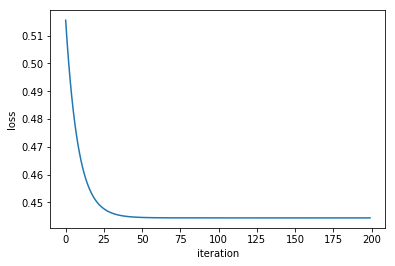

In [26]:
filename = 'iris.txt'
if os.path.isfile(filename):
    f = open(filename, "r")
    data = np.asarray([line.split() for line in f], dtype = float)
    np.random.shuffle(data)
    train = data[:140]
    test = data[140:]
    inPutData = np.asarray([row[:4] for row in train], dtype = float)
    outPutData = np.asarray([row[4:] for row in train], dtype = float)
    inPutTest = np.asarray([row[:4] for row in test], dtype = float)
    outPutTest = np.asarray([row[4:] for row in test], dtype = float)
    f.close() 

# initialize net
net = neuralNetwork(inPutData[0], outPutData[0])
# learning
for i in range(200):
    if i%50==0: print(i)
    for inp, outp in zip(inPutData, outPutData):
        net.setInPut(inp)
        net.setOutPut(outp)
        net.feedforward()
        net.backpropagation()
    net.loss = np.append(net.loss, np.average(net.epochLoss))
    net.epochLoss = np.empty((0))
# show loss
plt.plot(net.loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [24]:
# test results
for inp, outp in zip(inPutTest, outPutTest):
    net.setInPut(inp)
    net.setOutPut(outp)
    net.feedforward()
    #print('net.inPut')
    #print(net.inPut)
    print('net.outPut')
    print(net.outPut)
    print('net.y')
    print(net.y)
    print('')

net.outPut
[0. 0. 1.]
net.y
[0.32414464 0.34157994 0.33068022]

net.outPut
[0. 1. 0.]
net.y
[0.32533097 0.34266748 0.33183028]

net.outPut
[1. 0. 0.]
net.y
[0.32760453 0.34475058 0.33403386]

net.outPut
[0. 1. 0.]
net.y
[0.32436601 0.34178292 0.33089485]

net.outPut
[1. 0. 0.]
net.y
[0.32802039 0.34513144 0.33443685]

net.outPut
[0. 0. 1.]
net.y
[0.32366817 0.34114305 0.33021828]

net.outPut
[1. 0. 0.]
net.y
[0.32776843 0.34490069 0.33419269]

net.outPut
[0. 0. 1.]
net.y
[0.32262508 0.34018635 0.32920689]

net.outPut
[0. 0. 1.]
net.y
[0.32294081 0.34047596 0.32951304]

net.outPut
[1. 0. 0.]
net.y
[0.32777752 0.34490902 0.3342015 ]

